# County Election EDA and Processing
This notebook provides some data exploration with plots, some feature engineering and final processing before modeling. The resulting dataframe is exported as a csv file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in data file

df = pd.read_csv('data/county_election_data.csv')

In [3]:
df.head()

,Unnamed: 0,code,Name,State,population,land_area,growth,households,median_age,hisp_pop,...,college_rate,votes_dem,votes_gop,total_votes,per_dem,per_gop,diff,per_point_diff,state_abbr,county_name
0,0,1001,Autauga,AL,55504.0,594.44,1.7,20800.0,37.8,1416.0,...,24.6,5908.0,18110.0,24661.0,0.239569,0.734358,12202.0,49.48,AL,Autauga County
1,1,1003,Baldwin,AL,212628.0,1589.78,16.7,75149.0,42.3,8712.0,...,29.5,18409.0,72780.0,94090.0,0.195653,0.773515,54371.0,57.79,AL,Baldwin County
2,2,1005,Barbour,AL,25270.0,884.88,-8.0,9122.0,38.7,1147.0,...,12.9,4848.0,5431.0,10390.0,0.466603,0.522714,583.0,5.61,AL,Barbour County
3,3,1007,Bibb,AL,22668.0,622.58,-1.1,7048.0,40.2,502.0,...,12.0,1874.0,6733.0,8748.0,0.214220,0.769662,4859.0,55.54,AL,Bibb County
4,4,1009,Blount,AL,58013.0,644.78,1.2,20619.0,40.8,5036.0,...,13.0,2150.0,22808.0,25384.0,0.084699,0.898519,20658.0,81.38,AL,Blount County


In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

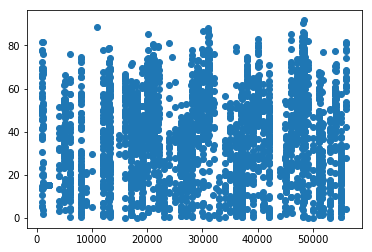

In [5]:
# scatter plot point diff by county code
plt.scatter(df['code'], df['per_point_diff'])
figsize=(8,6)

In [6]:
st_dist = pd.DataFrame(df.groupby(['State'])['per_point_diff'].mean())

In [7]:
st_dist.reset_index(inplace=True)

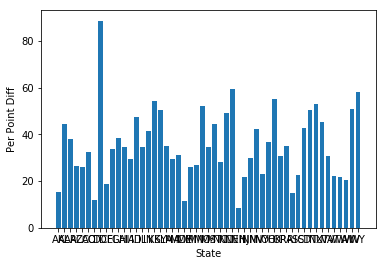

In [8]:
# plot state vs point diff
objects = st_dist['State']
y_pos = np.arange(len(objects))
 
plt.bar(st_dist['State'], st_dist['per_point_diff'])
plt.xticks(y_pos, objects)
plt.ylabel('Per Point Diff')
plt.xlabel('State')
 
plt.show()
figsize=(12, 12)

In [9]:
# sort data by smallest point dif values

df.sort_values(['per_point_diff'])

,code,Name,State,population,land_area,growth,households,median_age,hisp_pop,white_pop,...,college_rate,votes_dem,votes_gop,total_votes,per_dem,per_gop,diff,per_point_diff,state_abbr,county_name
2783,49019,Grand,UT,9674.0,3671.54,4.9,3820.0,39.7,930.0,9159.0,...,27.1,1932.0,1934.0,4456.0,0.433573,0.434022,2.0,0.04,UT,Grand County
2958,53011,Clark,WA,474643.0,629.00,11.6,164354.0,37.8,39042.0,381593.0,...,27.9,90697.0,90590.0,195784.0,0.463250,0.462704,107.0,0.05,WA,Clark County
1705,31109,Lancaster,NE,314358.0,837.55,10.1,119254.0,33.0,19707.0,262334.0,...,37.3,60533.0,60456.0,129803.0,0.466345,0.465752,77.0,0.06,NE,Lancaster County
587,16081,Teton,ID,11381.0,449.46,11.9,3725.0,35.6,1814.0,9575.0,...,40.0,2157.0,2161.0,4966.0,0.434354,0.435159,4.0,0.08,ID,Teton County
1766,33011,Hillsborough,NH,409697.0,876.14,2.2,156114.0,40.3,24490.0,367298.0,...,36.3,99589.0,100013.0,210622.0,0.472833,0.474846,424.0,0.20,NH,Hillsborough County
2812,50019,Orleans,VT,26841.0,693.27,-1.4,11360.0,45.1,355.0,26137.0,...,22.1,5181.0,5158.0,10988.0,0.471514,0.469421,23.0,0.21,VT,Orleans County
763,18141,St Joseph,IN,270434.0,457.85,1.3,100861.0,36.4,21797.0,211802.0,...,28.2,52247.0,52019.0,109452.0,0.477351,0.475268,228.0,0.21,IN,St. Joseph County
1950,37127,Nash,NC,93991.0,540.41,-1.9,36678.0,41.2,6163.0,50234.0,...,19.6,23024.0,23142.0,46903.0,0.490885,0.493401,118.0,0.25,NC,Nash County
1186,23027,Waldo,ME,39832.0,729.92,2.7,16820.0,45.4,446.0,37789.0,...,29.2,10442.0,10378.0,22630.0,0.461423,0.458595,64.0,0.28,ME,Waldo County
2086,39093,Lorain,OH,307924.0,491.10,2.2,117609.0,41.2,28288.0,259775.0,...,23.5,64958.0,65346.0,136654.0,0.475346,0.478186,388.0,0.28,OH,Lorain County


In [10]:
# close counties

#num_counties = int(0.1 * len(df))
df_1 = df[df['per_point_diff'] <= 5]
len(df_1)

161

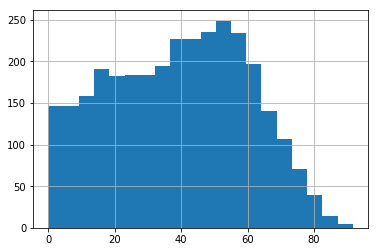

In [11]:
df['per_point_diff'].hist(bins=20);

## Feature Engineering

In [12]:
# create density column

df['density'] = df['population'] / df['land_area']

In [13]:
# create white population rate

df['white_rate'] = df['white_pop'] / df['population']

In [14]:
# create hispanic population rate

df['hisp_rate'] = df['hisp_pop'] / df['population']

In [15]:
df.head()

,code,Name,State,population,land_area,growth,households,median_age,hisp_pop,white_pop,...,total_votes,per_dem,per_gop,diff,per_point_diff,state_abbr,county_name,density,white_rate,hisp_rate
0,1001,Autauga,AL,55504.0,594.44,1.7,20800.0,37.8,1416.0,42311.0,...,24661.0,0.239569,0.734358,12202.0,49.48,AL,Autauga County,93.371913,0.762305,0.025512
1,1003,Baldwin,AL,212628.0,1589.78,16.7,75149.0,42.3,8712.0,172441.0,...,94090.0,0.195653,0.773515,54371.0,57.79,AL,Baldwin County,133.746808,0.810999,0.040973
2,1005,Barbour,AL,25270.0,884.88,-8.0,9122.0,38.7,1147.0,12430.0,...,10390.0,0.466603,0.522714,583.0,5.61,AL,Barbour County,28.557545,0.491888,0.045390
3,1007,Bibb,AL,22668.0,622.58,-1.1,7048.0,40.2,502.0,17370.0,...,8748.0,0.214220,0.769662,4859.0,55.54,AL,Bibb County,36.409779,0.766278,0.022146
4,1009,Blount,AL,58013.0,644.78,1.2,20619.0,40.8,5036.0,55073.0,...,25384.0,0.084699,0.898519,20658.0,81.38,AL,Blount County,89.973324,0.949322,0.086808


## Remove unneeded columns

In [16]:
df.columns

Index(['code', 'Name', 'State', 'population', 'land_area', 'growth',
       'households', 'median_age', 'hisp_pop', 'white_pop', 'per_cap_income',
       'hh_income', 'labor_force', 'unempl_rate', 'poverty_rate', 'hs_rate',
       'college_rate', 'votes_dem', 'votes_gop', 'total_votes', 'per_dem',
       'per_gop', 'diff', 'per_point_diff', 'state_abbr', 'county_name',
       'density', 'white_rate', 'hisp_rate'],
      dtype='object')

In [17]:
columns = ['Name', 'State', 'hisp_pop', 'white_pop', 'labor_force',
           'votes_dem', 'votes_gop', 'total_votes', 'per_dem', 'land_area',
           'per_gop', 'diff', 'state_abbr', 'county_name']
df_model = df.drop(columns, axis=1)

In [18]:
df_model.head()

,code,population,growth,households,median_age,per_cap_income,hh_income,unempl_rate,poverty_rate,hs_rate,college_rate,per_point_diff,density,white_rate,hisp_rate
0,1001,55504.0,1.7,20800.0,37.8,39721.0,54487.0,3.9,13.5,87.6,24.6,49.48,93.371913,0.762305,0.025512
1,1003,212628.0,16.7,75149.0,42.3,41286.0,56460.0,4.0,11.7,90.0,29.5,57.79,133.746808,0.810999,0.040973
2,1005,25270.0,-8.0,9122.0,38.7,31788.0,32884.0,5.9,29.9,73.8,12.9,5.61,28.557545,0.491888,0.045390
3,1007,22668.0,-1.1,7048.0,40.2,29264.0,43079.0,4.4,20.1,80.7,12.0,55.54,36.409779,0.766278,0.022146
4,1009,58013.0,1.2,20619.0,40.8,31470.0,47213.0,4.0,14.1,80.0,13.0,81.38,89.973324,0.949322,0.086808


In [19]:
# classify close as '1' and not close as '0'

thresh = 5 # define close election threshold
df_model['close_elect'] = pd.DataFrame(np.where(df['per_point_diff'] <= thresh, 1, 0))
df_model = df_model.drop('per_point_diff', axis=1)

In [20]:
df_model.head()

,code,population,growth,households,median_age,per_cap_income,hh_income,unempl_rate,poverty_rate,hs_rate,college_rate,density,white_rate,hisp_rate,close_elect
0,1001,55504.0,1.7,20800.0,37.8,39721.0,54487.0,3.9,13.5,87.6,24.6,93.371913,0.762305,0.025512,0
1,1003,212628.0,16.7,75149.0,42.3,41286.0,56460.0,4.0,11.7,90.0,29.5,133.746808,0.810999,0.040973,0
2,1005,25270.0,-8.0,9122.0,38.7,31788.0,32884.0,5.9,29.9,73.8,12.9,28.557545,0.491888,0.045390,0
3,1007,22668.0,-1.1,7048.0,40.2,29264.0,43079.0,4.4,20.1,80.7,12.0,36.409779,0.766278,0.022146,0
4,1009,58013.0,1.2,20619.0,40.8,31470.0,47213.0,4.0,14.1,80.0,13.0,89.973324,0.949322,0.086808,0


# Save to File

In [21]:
# set index to county code
df_model.set_index('code', inplace=True)

In [22]:
# drop nan values
df_model.dropna()

,population,growth,households,median_age,per_cap_income,hh_income,unempl_rate,poverty_rate,hs_rate,college_rate,density,white_rate,hisp_rate,close_elect
code,,,,,,,,,,,,,,
1001,55504.0,1.7,20800.0,37.8,39721.0,54487.0,3.9,13.5,87.6,24.6,93.371913,0.762305,0.025512,0
1003,212628.0,16.7,75149.0,42.3,41286.0,56460.0,4.0,11.7,90.0,29.5,133.746808,0.810999,0.040973,0
1005,25270.0,-8.0,9122.0,38.7,31788.0,32884.0,5.9,29.9,73.8,12.9,28.557545,0.491888,0.045390,0
1007,22668.0,-1.1,7048.0,40.2,29264.0,43079.0,4.4,20.1,80.7,12.0,36.409779,0.766278,0.022146,0
1009,58013.0,1.2,20619.0,40.8,31470.0,47213.0,4.0,14.1,80.0,13.0,89.973324,0.949322,0.086808,0
1011,10309.0,-5.5,3556.0,39.2,26661.0,34278.0,4.9,32.6,66.6,10.3,16.552665,0.223203,0.001261,0
1013,19825.0,-5.4,7675.0,40.6,33694.0,35409.0,5.5,24.8,81.1,16.1,25.520384,0.548600,0.012762,0
1015,114728.0,-3.2,45071.0,39.1,34401.0,41778.0,4.9,17.1,82.3,17.7,189.360754,0.756372,0.034708,0
1017,33713.0,-1.5,13851.0,43.1,31925.0,39530.0,4.1,19.9,80.3,12.5,56.515179,0.575950,0.004390,0


In [23]:
df_model.head()

,population,growth,households,median_age,per_cap_income,hh_income,unempl_rate,poverty_rate,hs_rate,college_rate,density,white_rate,hisp_rate,close_elect
code,,,,,,,,,,,,,,
1001,55504.0,1.7,20800.0,37.8,39721.0,54487.0,3.9,13.5,87.6,24.6,93.371913,0.762305,0.025512,0
1003,212628.0,16.7,75149.0,42.3,41286.0,56460.0,4.0,11.7,90.0,29.5,133.746808,0.810999,0.040973,0
1005,25270.0,-8.0,9122.0,38.7,31788.0,32884.0,5.9,29.9,73.8,12.9,28.557545,0.491888,0.045390,0
1007,22668.0,-1.1,7048.0,40.2,29264.0,43079.0,4.4,20.1,80.7,12.0,36.409779,0.766278,0.022146,0
1009,58013.0,1.2,20619.0,40.8,31470.0,47213.0,4.0,14.1,80.0,13.0,89.973324,0.949322,0.086808,0


In [24]:
# export dataframe as csv file
df_model.to_csv('data/county_data.csv')